In [1]:
import requests
from PIL import Image
import io

## CoSI api - 2021 data

The CoSI API provides congestion represented as spatiotemporal patterns.

In [2]:
url = 'http://dittlab-backend.tudelft.nl/cosi-api-new/service'


### 1. Context search
The contextual search specifies various criteria for expected patterns, including:
- Road number [`road_num`]: a list of roads where congestion can occur.
- Date [`date`]: dates on when congestion occurs. This could be a range or a list of dates.
- Time/Space extent [`time_ext, space_ext`]: specify how long or how far congestion lasts or propogates.
- Total delay [`total_delay`]: the expected delay caused by congestion
- Number of disturnbances [`number_of_disturbances`]: number of disturbances in congestion
- Number of patterns [`num_pattern`]: expected number of patterns to obtain
- Sort [`sort`]: to order patterns w.r.t certain features
- Expected features [`return`]: specifies which features of congestion to get in return

In [3]:
url = 'http://dittlab-backend.tudelft.nl/cosi-api-new/service'
postdata = {
    'service':'context_search',
    'road_num': [1],
    'convert_image': False,
    'return_speed': False,
    'image_size': (200, 200),
    'num_pattern': 20,
    'sort': {
        'on': 'space_ext',
        'order': 'dec'
    },
    'return': ['id', 'speed', 'date', 'road_number', 'space_extent', 'time_extent', 'number_of_disturbances', 'total_delay', 'global_index', 'representative', 'image_path']
}
res = requests.post(url, json=postdata)

In [4]:
data = res.json()['data']

In [5]:
# first pattern
data['15']

{'date': '2022-04-15',
 'global_index': 0,
 'id': 200661,
 'image_path': 'https://dittlab-backend.tudelft.nl/cosi-api-new/image/2022/04/15/0.png',
 'number_of_disturbances': nan,
 'representative': True,
 'road_number': ['A1'],
 'space_extent': 38516,
 'time_extent': 456,
 'total_delay': 2097}

/Users/tinnguyen/.venv/cosi/lib/python3.8/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'dittlab-backend.tudelft.nl'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


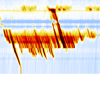

In [6]:
response = requests.get(data['15']['image_path'], verify=False)
img = Image.open(io.BytesIO(response.content))
img

## 2. ID search

Each pattern is associated with an id. This id can also be used to query the pattern. Could be useful in case certain extra information is needed for the pattern.

In [7]:
postdata = {
    'service':'data_retrieval',
    'id': 29820,
}
res = requests.post(url, json=postdata)

In [8]:
pattern = res.json()['data']
pattern.keys()

dict_keys(['date', 'flow', 'geojson', 'id', 'space_resolution', 'speed', 't', 'time_resolution', 'x'])